In [2]:
import torch

import fastai

In [4]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)


# label getter function
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func= label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))
#  fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

epoch,train_loss,valid_loss,time
0,2.957982,2.061268,00:01


epoch,train_loss,valid_loss,time
0,1.640559,1.425758,00:01
1,1.472240,1.279630,00:01
2,1.382028,1.081774,00:01
3,1.261010,0.931409,00:01
4,1.159991,0.890508,00:01
5,1.059018,0.763310,00:01
6,0.969873,0.728390,00:01
7,0.892474,0.701400,00:01
8,0.824438,0.705401,00:01
9,0.765486,0.674181,00:01


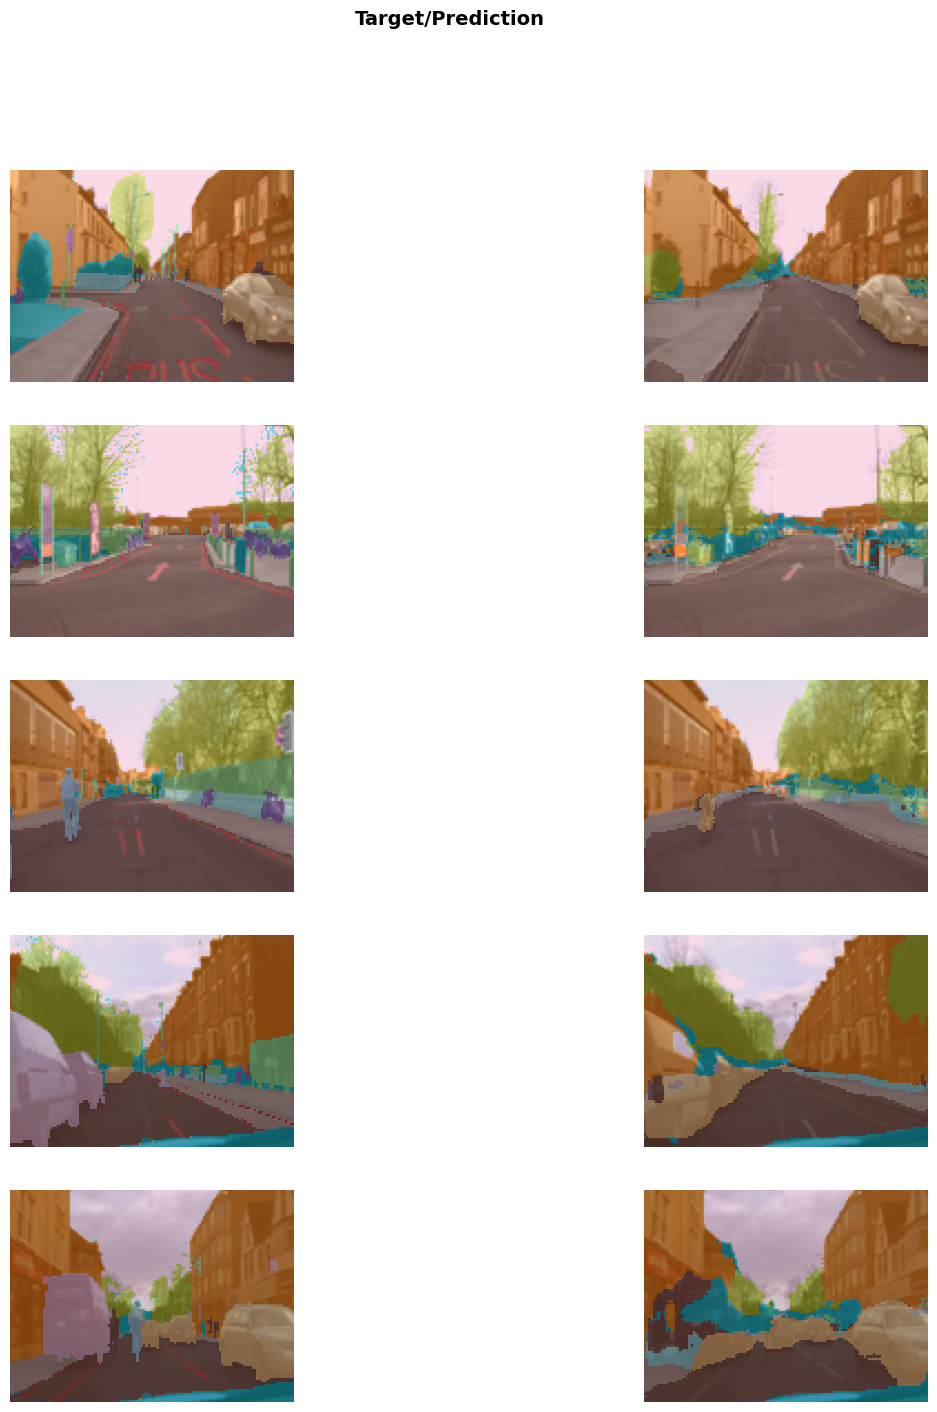

In [7]:
learn.show_results(max_n=5, figsize=(15, 16))